In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
plt.rcParams.update({'font.size': 12})

# Árvores de decisão

Uma árvore de decisão é uma árvore binária onde os vários nós não-terminais correspondem a decisões acerca da amostra sendo analisada, e as folhas correspondem aos valores de predição. Por exemplo, considere o famoso dataset "Iris" e o problema de classificar as flores em "virginica", "versicolor" e "setosa".

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.Series(iris['target'], name='class')

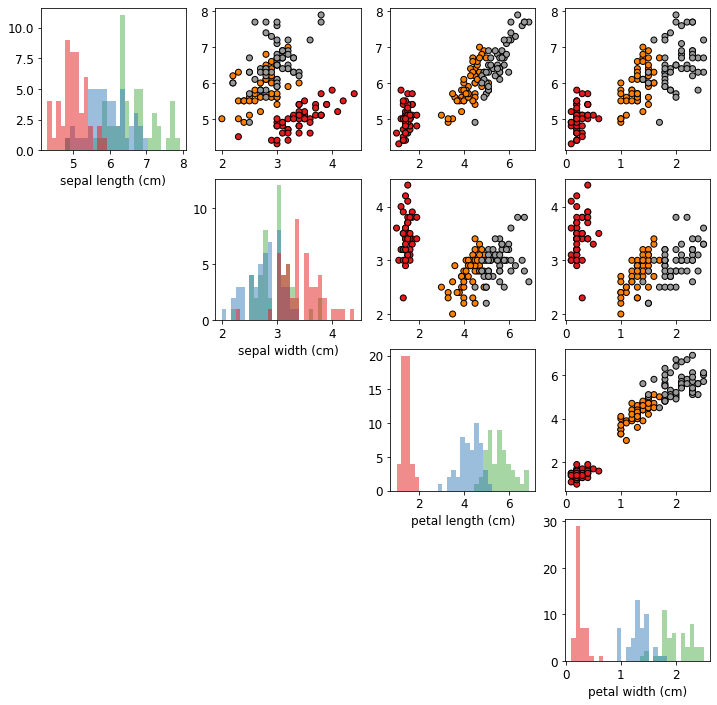

In [3]:
def plot_hist(X, y):
    bins = np.linspace(X.min(), X.max(), 30)
    for c in y.value_counts().index:
        plt.hist(X[y == c].values, bins=bins, label=str(c), 
                 alpha=0.5, color=plt.cm.Set1.colors[c])

def plot_scatter(X, y):
    cols = X.columns
    n = len(cols)
    for i in range(n):
        plt.subplot(n, n, i*n + i + 1)
        plot_hist(X[cols[i]], y)
        plt.xlabel(cols[i])

        for j in range(i+1, n):
            plt.subplot(n, n, i*n + j + 1)
            plt.scatter(X[cols[j]], X[cols[i]], c=y, cmap=plt.cm.Set1, edgecolor='k')
    
plt.figure(figsize=(12, 12))
plot_scatter(X, y)
plt.show()

 Para simplificar nossa explanação, vamos nos limitar ao uso de apenas duas características: sepal width e petal width

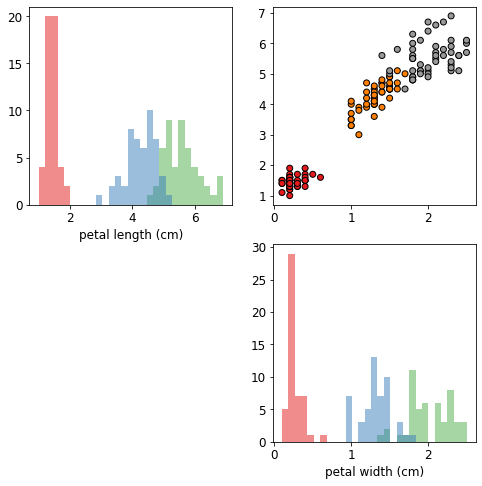

In [4]:
X_simple = X[['petal length (cm)', 'petal width (cm)']]
plt.figure(figsize=(8, 8))
plot_scatter(X_simple, y)
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_simple, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="iris_tree.dot", 
                feature_names=['petal length (cm)', 'petal width (cm)'],
                class_names=iris.target_names, rounded=True, filled=True)

<img src='iris_tree.png'/>

Observe que em cada nó o coeficiente Gini diminui em relação ao nó do nível precedente.

**Atividade:** Estude o material do capítulo 6 e responda:

- O que é CART?

CART (Classification ans Regression Trees) é um algoritmo de treinamento de árvores de treinamento, baseado na noção de impureza do nó, que induz a partição do dataset em cada nó da árvore de modo a diminuir a impureza resultante do particionamento.

- O que são modelos paramétricos e não-paramétricos?

Modelos paramétricos são aqueles modelos em que o número de parâmetros é fixo independente do dataset. Modelos não-paramétricos são aqueles em que o número de parâmetros não é pré-determinado, mas sim depende do próprio dataset de treinamento.

- Qual o principal hiperparâmetro de regularização de uma árvore de decisão? Porque temos overfitting se este parâmetro não for restrito?

O principal parâmetro de regularização de uma árvore de decisão é a profundidade máxima da árvore (max_depth). Caso esse parâmetro não seja restrito, a árvore pode expandir até que cada ponto do conjunto de treinamento vire uma partição por si só; neste caso, teremos overfitting (aprendeu até o ruído).

- CART consegue fazer tanto classificação (multiclasse inclusive!) como regressão! O que muda no CART entre classificação e regressão?

A medida de impureza muda.

- Explique porque não é necessário re-escalar as *features* quando usamos uma árvore de decisão.

Porque no algoritmo CART não importa o valor do corte, apenas a pureza das partições dele resultantes.

- (Ex. 5 Géron): Se para treinar um modelo de árvore de decisão com 1 milhão de amostras levamos 1 hora, quanto tempo a mais levaríamos para treinar um modelo com 10 milhões de amostras?

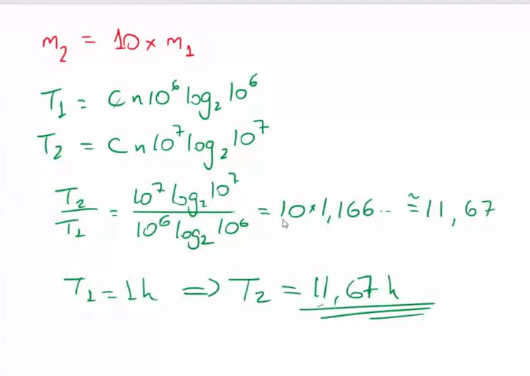

**Atividade:** Exercício 7 do livro texto (Géron)

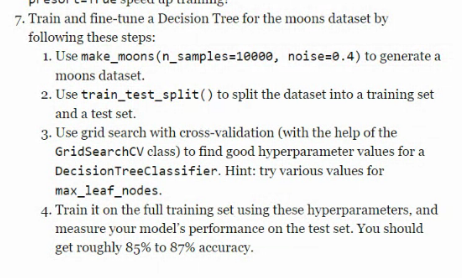

Train and fine-tune a Decision Tree for the moons dataset by following these steps: 

1. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.
2. Use train_test_split() to split the dataset into a training set and a test set.
3. Use grid search with Cross-Validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: Try various values for max_leaf_nodes.
4. Train it on the full training set using these hypermarameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    tree_clf, 
    {
#         'max_depth': [k for k in np.arange(0, 10, 1)], 
        'max_leaf_nodes': list(range(2, 100)), 
        'min_samples_split': [2, 3, 4],
    },
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

{'max_leaf_nodes': 17, 'min_samples_split': 2}
DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)


In [9]:
from sklearn.model_selection import cross_val_predict
y_pred_test = cross_val_predict(grid.best_estimator_, X_test, y_test, cv=3, n_jobs=-1)

In [10]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_test)}')

Accuracy: 0.8575


**Desafio (não precisa entregar)**: Exercício 8 do livro texto (Géron)